notebook to compare two pick files for a given track

Brandon S. Tober

24SEP2020

In [1]:
### imports ###
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [24, 12]

In [2]:
# data path
in_path = "/home/btober/Documents/alsek/"
flist = glob.glob(in_path + "*.csv")
print(flist)

['/home/btober/Documents/alsek/20200605-224621_pk_bst.csv', '/home/btober/Documents/alsek/20200605-225120_pk_bst.csv', '/home/btober/Documents/alsek/20200605-225639_pk_bst.csv', '/home/btober/Documents/alsek/20200605-223726_pk_bst.csv']


In [3]:
# file names
f1 = "20200605-225120_pk_bst.csv"
f2 = f1

In [4]:
# read in each file
dat1 = pd.read_csv(in_path + f1,delimiter=",",index_col=False,header=0)
# ensure proper indexing
dat1 = dat1.sort_values(by=['trace'])
dat1 = dat1.reset_index()

dat2 = pd.read_csv(in_path + f2,delimiter=",",index_col=False,header=0)
# ensure proper indexing
dat2 = dat2.sort_values(by=['trace'])
dat2 = dat2.reset_index()

Text(0, 0.5, '# samples')

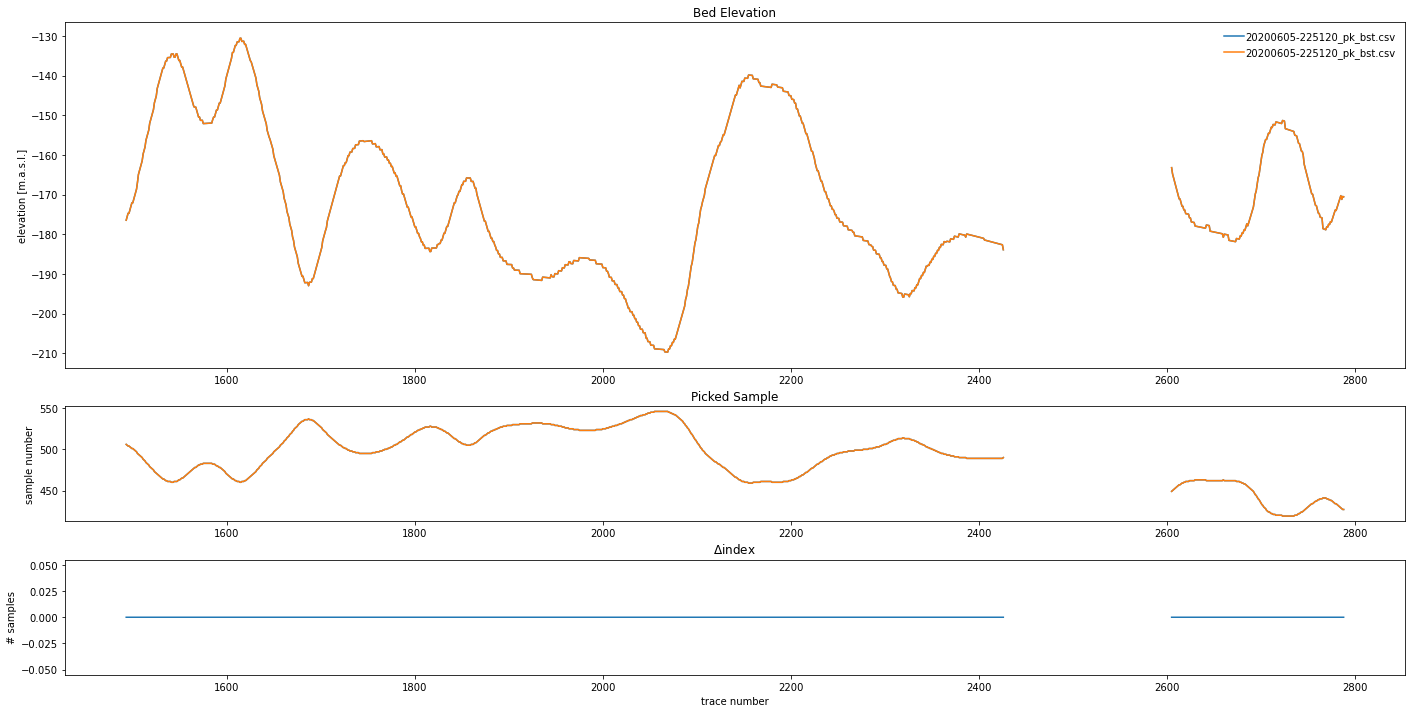

In [5]:
# plot
fig, ax = plt.subplots(3,1,gridspec_kw={'height_ratios': [3, 1, 1]})
# upper plot bed elevation
ax[0].plot(dat1["subsrfElev"], label=f1)
ax[0].plot(dat2["subsrfElev"], label=f2)
ax[0].set_title("Bed Elevation")
ax[0].set_ylabel("elevation [m.a.s.l.]")
ax[0].legend(loc="upper right",fancybox=True, framealpha=0,ncol=1,handletextpad=0.1)

# middle plot pick idx
ax[1].plot(dat1["subsurfIdx"])
ax[1].plot(dat2["subsurfIdx"])
ax[1].set_title("Picked Sample")
ax[1].set_ylabel("sample number")

# lower plot difference in pick idx
ax[2].plot(dat1["subsurfIdx"] - dat2["subsurfIdx"])
ax[2].set_title(r"$\Delta$" + "index")
ax[2].set_xlabel("trace number")
ax[2].set_ylabel("# samples")
